<a href="https://colab.research.google.com/github/jacksonguedes/PDS/blob/main/Quest%C3%A3o_do_livro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

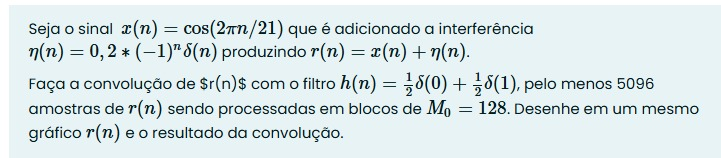

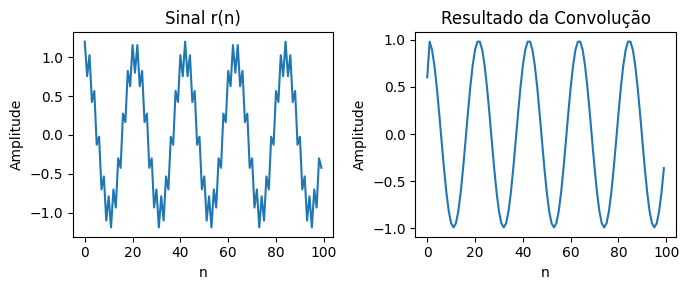

<Figure size 640x480 with 0 Axes>

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Gerar o sinal x(n)
N = 5096  # Número de amostras a serem processadas
n = np.arange(N)
x_n = np.cos(2 * np.pi * n / 21)

# 2. Gerar a interferência η(n) e produzir r(n)
eta_n = 0.2 * (-1)**n
r_n = x_n + eta_n

# 3. Definir o filtro h(n)
h_n = np.array([0.5, 0.5])

# 4. Processamento em blocos de tamanho M_0 = 128
M_0 = 128
num_blocks = N // M_0  # Número de blocos
convolution_result = np.zeros(N)  # Resultado da convolução

# Convolução em blocos
for i in range(num_blocks):
    start = i * M_0
    end = start + M_0
    block = r_n[start:end]

    # Convolução de cada bloco
    conv_block = np.convolve(block, h_n, mode='same')

    # Inserir o resultado da convolução no lugar correto
    convolution_result[start:end] = conv_block

# 5. Desenhar r(n) e o resultado da convolução com zoom
plt.figure(figsize=(7, 3))

# Definir a faixa de amostras para o zoom
zoom_start = 0
zoom_end = 100  # Visualizar as primeiras 500 amostras

# Gráfico do sinal r(n)
plt.subplot(1, 2, 1)
plt.plot(n[zoom_start:zoom_end], r_n[zoom_start:zoom_end])
plt.title('Sinal r(n)')
plt.xlabel('n')
plt.ylabel('Amplitude')

# Gráfico do resultado da convolução
plt.subplot(1, 2, 2)
plt.plot(n[zoom_start:zoom_end], convolution_result[zoom_start:zoom_end])
plt.title('Resultado da Convolução')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
plt.savefig('resultado_convolucao_zoom.png', dpi=300)